# DATA

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np

In [2]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## load data & dropna

In [3]:
# Read salary data
file_path = Path("Resources/Stroke_dataset.csv")
df_stroke = pd.read_csv(file_path)

# Display sample data
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df_stroke_cleaned = df_stroke.dropna(subset=['bmi'])
df_stroke_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


## preprocess categorical data & remove irrelevant features

In [6]:
X = df_stroke_cleaned.drop(columns=['stroke', 'id'], inplace=False)
y = df_stroke_cleaned['stroke']

In [7]:
X = pd.get_dummies(X)
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,False,True,False,False,True,...,False,True,False,False,False,True,False,True,False,False
2,80.0,0,1,105.92,32.5,False,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.4,True,False,False,False,True,...,False,True,False,False,False,True,False,False,False,True
4,79.0,1,0,174.12,24.0,True,False,False,False,True,...,False,False,True,False,True,False,False,False,True,False
5,81.0,0,0,186.21,29.0,False,True,False,False,True,...,False,True,False,False,False,True,False,True,False,False


## train test split & resampling

In [8]:
# 85:15 Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.15,
                                                    random_state=42, 
                                                    stratify=y)

In [9]:
# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# Undersample (select)
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train_scaled, y_train)

In [11]:
# Oversample / SMOTE (select)
smote = SMOTE(sampling_strategy='minority', random_state=1)
X_train_over, y_train_over = smote.fit_resample(X_train_scaled, y_train)

In [12]:
# SMOTE & Undersample (select)

# Specify the sampling strategy
smote = SMOTE(sampling_strategy='minority', random_state=42)
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])

# Fit and resample the data
X_train_combo, y_train_combo = pipeline.fit_resample(X_train_scaled, y_train)

In [13]:
unique, counts = np.unique(y_train_under, return_counts=True)
print("Class Distribution After Resample:", dict(zip(unique, counts)))

Class Distribution After Resample: {0: 178, 1: 178}


In [14]:
unique, counts = np.unique(y_train_over, return_counts=True)
print("Class Distribution After Resample:", dict(zip(unique, counts)))


Class Distribution After Resample: {0: 3994, 1: 3994}


# MODELS

In [15]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
# Decsion Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import seaborn as sns
# DNN
import tensorflow as tf
import keras_tuner as kt

from sklearn.metrics import confusion_matrix,classification_report, r2_score, accuracy_score


## logistic regression

In [16]:
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [17]:
# SELECT: Base / Under / Oversampling

#X_train_log = X_train_scaled
X_train_log = X_train_over
#X_train_log = X_train_under

#y_train_log = y_train
y_train_log = y_train_over
#y_train_log = y_train_under


In [18]:
# Train the data
classifier.fit(X_train_log, y_train_log)

LogisticRegression(random_state=1)

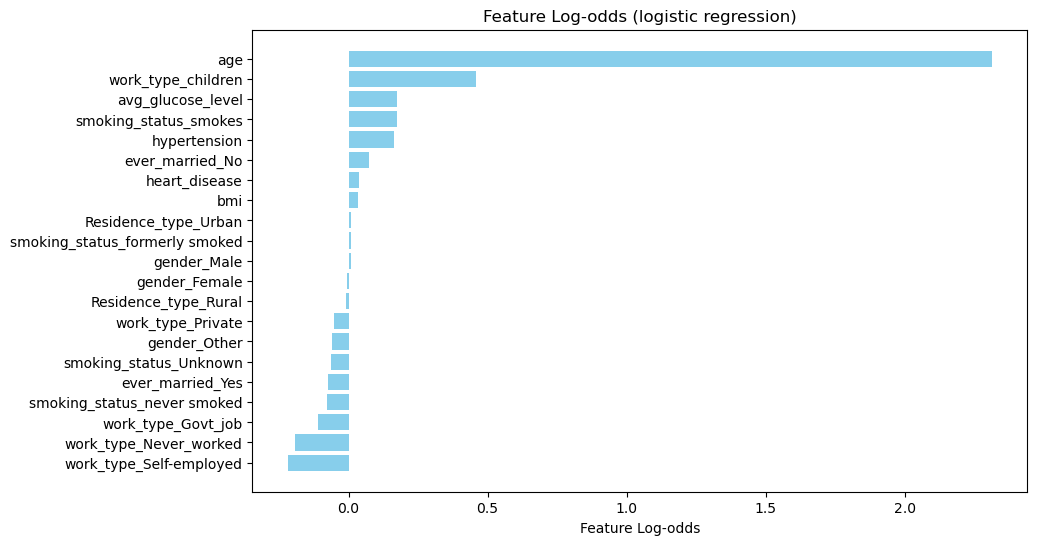

In [19]:
X_variables = X.columns.tolist()
coefficients_log = classifier.coef_.flatten().tolist()
log_odds = pd.DataFrame({"X_variables": X_variables, "Log-odds": coefficients_log}).set_index('X_variables')
log_odds = log_odds.sort_values(by='Log-odds', ascending=False)


plt.figure(figsize=(10,6))
plt.barh(log_odds.index, log_odds['Log-odds'], color='skyblue')
plt.xlabel('Feature Log-odds')
plt.title('Feature Log-odds (logistic regression)')
plt.gca().invert_yaxis() 
plt.show()
 

In [20]:
# Score the model
print(f"Training Data Score: {classifier.score(X_train_log, y_train_log)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.793064596895343
Testing Data Score: 0.762550881953867


In [21]:
# Predict outcomes for test data set
y_pred = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": y_pred, "Actual": y_test})

,Prediction,Actual
4646,0,0
829,1,0
3191,0,0
3199,0,0
495,1,0
...,...,...
3746,0,0
3515,0,0
3510,0,0
2291,0,0


In [22]:
# Print confusion matrix
log_cm = confusion_matrix(y_test, y_pred)
log_cm_df = pd.DataFrame(log_cm, index=["Actual - No stroke", "Actual - Stroke"], columns = ["Predicted - No stroke", "Predicted - Stroke"])

print("Confusion Matrix (logistic regression)")
print(log_cm_df)

acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_score:.2f}")

Confusion Matrix (logistic regression)
                    Predicted - No stroke  Predicted - Stroke
Actual - No stroke                    541                 165
Actual - Stroke                        10                  21
Accuracy Score: 0.76


In [23]:
# Print classification report
target_names = ["No stroke", "Stroke"]
print("Classification Report (logistic regression)")
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report (logistic regression)
              precision    recall  f1-score   support

   No stroke       0.98      0.77      0.86       706
      Stroke       0.11      0.68      0.19        31

    accuracy                           0.76       737
   macro avg       0.55      0.72      0.53       737
weighted avg       0.95      0.76      0.83       737



## knn

In [24]:
# Instantiate the model with k = 3 neighbors
model = KNeighborsClassifier(n_neighbors=14)

In [25]:
# SELECT: Base / Under / Oversampling

#X_train_knn = X_train_scaled
#X_train_knn = X_train_over
X_train_knn = X_train_under

#y_train_knn = y_train
#y_train_knn = y_train_over
y_train_knn = y_train_under


In [26]:
# Train the model
model.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=14)

### Calculate permutation feature importance
results = permutation_importance(model, X_train_knn, y_train_knn, n_repeats=1000, random_state=42)

importance_df = pd.DataFrame({
    'Feature': X_variables,  # Use the columns of your DataFrame for feature names
    'Permutation Importance': results.importances_mean
})

# Plot permutation feature importance
importance_df = importance_df.set_index('Feature')
importance_df = importance_df.sort_values(by='Permutation Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importance_df.index, importance_df['Permutation Importance'], color='skyblue')
plt.xlabel('Permutation Feature Importance')
plt.title('Permutation Feature Importance (k-nearest neighbor)')
plt.gca().invert_yaxis()
plt.show()

In [27]:
# Create predictions
y_pred = model.predict(X_test_scaled)
pd.DataFrame({"Prediction": y_pred, "Actual": y_test})

,Prediction,Actual
4646,1,0
829,1,0
3191,0,0
3199,0,0
495,0,0
...,...,...
3746,0,0
3515,1,0
3510,0,0
2291,0,0


In [28]:
# Print confusion matrix
knn_cm = confusion_matrix(y_test,y_pred)
knn_cm_df = pd.DataFrame(knn_cm, index = ["Actual - No stroke", "Actual - Stroke"], columns = ["Predicted - Stroke", "Predicted - No stroke"])

print("Confusion Matrix (k-nearest neighbor)")
print(knn_cm_df)

acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_score:.2f}")

Confusion Matrix (k-nearest neighbor)
                    Predicted - Stroke  Predicted - No stroke
Actual - No stroke                 535                    171
Actual - Stroke                      9                     22
Accuracy Score: 0.76


In [29]:
# Print classification report
target_names = ["No stroke", "Stroke"]
print("Classication Report (k-nearest neighbor)")
print(classification_report(y_test,y_pred, target_names=target_names))

Classication Report (k-nearest neighbor)
              precision    recall  f1-score   support

   No stroke       0.98      0.76      0.86       706
      Stroke       0.11      0.71      0.20        31

    accuracy                           0.76       737
   macro avg       0.55      0.73      0.53       737
weighted avg       0.95      0.76      0.83       737



## decision tree

In [30]:
# Step 6: Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)  # Limit depth to avoid overfitting
clf.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)

# Display the classification report
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       706
           1       0.00      0.00      0.00        31

    accuracy                           0.96       737
   macro avg       0.48      0.50      0.49       737
weighted avg       0.92      0.96      0.94       737



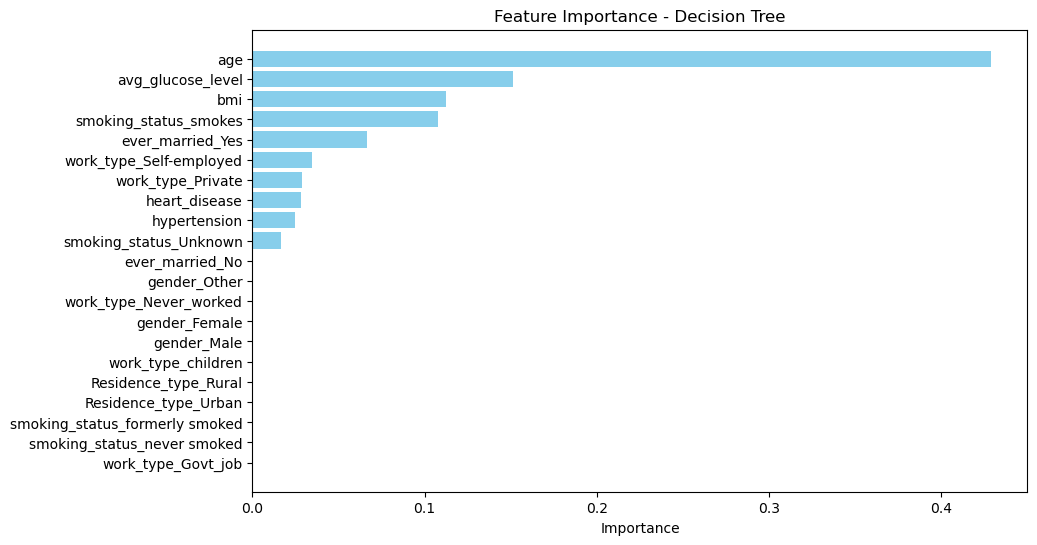

In [31]:
# Extract feature importance from the Decision Tree
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()  
plt.show()

## random forest

In [32]:
# Step 6: Train a Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=100,    # Number of trees
    max_depth=10,        # Maximum depth of each tree
    random_state=42,
    class_weight="balanced"  # Address class imbalance
)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [33]:
# Step 7: Evaluate the model
y_pred = rf_clf.predict(X_test)
report = classification_report(y_test, y_pred)

# Display the classification report
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       706
           1       0.12      0.13      0.12        31

    accuracy                           0.92       737
   macro avg       0.54      0.54      0.54       737
weighted avg       0.93      0.92      0.93       737



In [34]:
# Extract feature importance from the Random Forest model
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_clf.feature_importances_
})

# Sort the features by importance in descending order
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

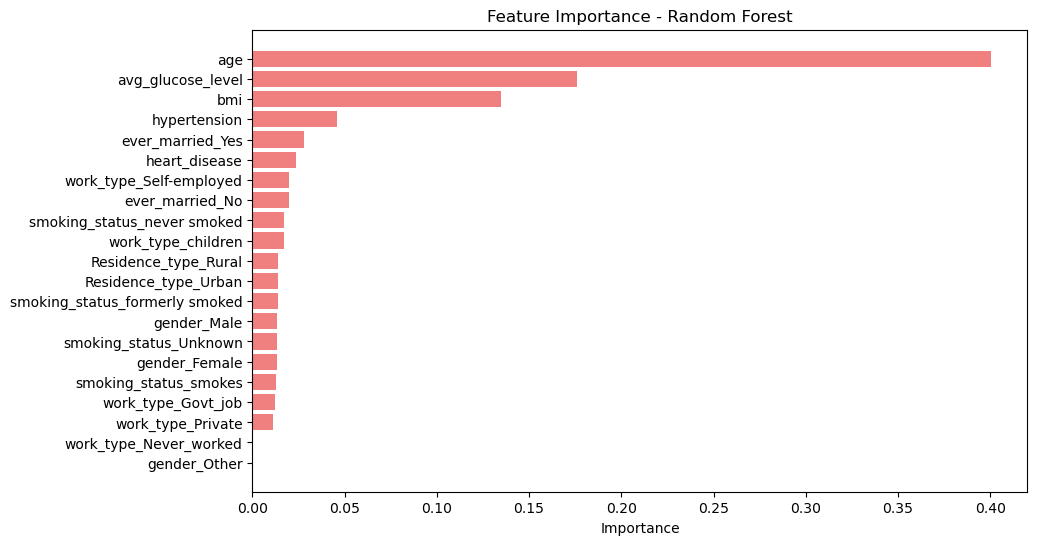

In [35]:
# Plot the feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

## naive bayes

In [36]:
# 3. Build the Naive Bayes Model
model = GaussianNB()
model.fit(X_train_over, y_train_over)

GaussianNB()

In [37]:
# 4. Evaluate the Model
y_pred = model.predict(X_test_scaled)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# R-squared score 
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 25.37%
R-squared: -17.52
Confusion Matrix:
[[156 550]
 [  0  31]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.22      0.36       706
           1       0.05      1.00      0.10        31

    accuracy                           0.25       737
   macro avg       0.53      0.61      0.23       737
weighted avg       0.96      0.25      0.35       737



In [38]:
# 5. Model Optimization - Hyperparameter Tuning

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_over, y_train_over)

# Best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Retrain the model with best parameters
optimized_model = GaussianNB(var_smoothing=best_params['var_smoothing'])
optimized_model.fit(X_train_over, y_train_over)

# Evaluate the optimized model
y_pred_optimized = optimized_model.predict(X_test_scaled)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Accuracy: {optimized_accuracy * 100:.2f}%")

# Final R-squared score for optimized model
optimized_r2 = r2_score(y_test, y_pred_optimized)
print(f"Optimized R-squared: {optimized_r2:.2f}")

Best Hyperparameters: {'var_smoothing': 1e-06}
Optimized Accuracy: 34.33%
Optimized R-squared: -15.30


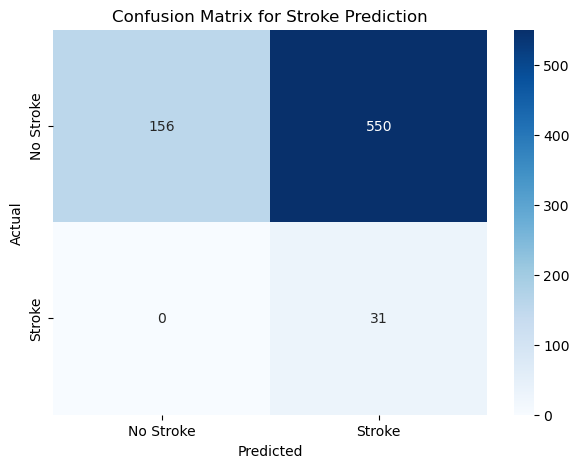

In [39]:
# 6. Model Performance Visualization (Confusion Matrix)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Stroke Prediction')
plt.show()

In [40]:
# 7. Save the results in CSV (for iterative tracking of optimization)
results = {
    'Model': ['Initial', 'Optimized'],
    'Accuracy': [accuracy, optimized_accuracy],
    'R-squared': [r2, optimized_r2],
    'Best var_smoothing': [None, best_params['var_smoothing']]
}
results_df = pd.DataFrame(results)
results_df.to_csv("model_optimization_results.csv", index=False)

In [41]:
# Final model performance output
print("Final Model Performance:")
print(results_df)

Final Model Performance:
       Model  Accuracy  R-squared  Best var_smoothing
0    Initial  0.253731 -17.520972                 NaN
1  Optimized  0.343284 -15.298456            0.000001


## dnn

In [42]:

# Define the model creation function
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation', ['relu', 'tanh', 'sigmoid'])

    # Allow kerastuner to decide number of neurons in the first layer
    nn_model.add(tf.keras.layers.Dense(
        units=hp.Int('first_units', min_value=1, max_value=12, step=2),
        activation=activation,
        input_dim=21
    ))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(
            units=hp.Int('units_' + str(i), min_value=1, max_value=10, step=2),
            activation=activation
        ))

    # Add output layer
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

# Instantiate the tuner
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2,
    directory="my_dir",
    project_name="tune_model"
)

# Run the kerastuner search for best hyperparameters
fit_model=tuner.search(X_train_over, y_train_over, epochs=20, validation_data=(X_test_scaled, y_test))

# Display the search results
tuner.results_summary()

Trial 60 Complete [00h 00m 06s]
val_accuracy: 0.8113975524902344

Best val_accuracy So Far: 0.9579375982284546
Total elapsed time: 00h 03m 17s
Results summary
Results in my_dir/tune_model
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0005 summary
Hyperparameters:
activation: sigmoid
first_units: 1
num_layers: 2
units_0: 3
units_1: 3
units_2: 5
units_3: 5
units_4: 5
units_5: 3
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.9579375982284546

Trial 0011 summary
Hyperparameters:
activation: sigmoid
first_units: 11
num_layers: 6
units_0: 1
units_1: 1
units_2: 9
units_3: 5
units_4: 1
units_5: 1
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.9579375982284546

Trial 0013 summary
Hyperparameters:
activation: sigmoid
first_units: 11
num_layers: 6
units_0: 1
units_1: 1
units_2: 9
units_3: 5
units_4: 1
units_5: 1
tuner/epochs: 7
tuner/initial_epoch: 3
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 00

In [43]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'sigmoid',
 'first_units': 1,
 'num_layers': 2,
 'units_0': 3,
 'units_1': 3,
 'units_2': 5,
 'units_3': 5,
 'units_4': 5,
 'units_5': 3,
 'tuner/epochs': 3,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0}

In [44]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

24/24 - 0s - 5ms/step - accuracy: 0.9579 - loss: 0.6779
Loss: 0.6778585314750671, Accuracy: 0.9579375982284546


In [45]:
predictions = best_model.predict(X_test_scaled)

# Convert predictions to binary or class labels (depending on your model output)
# Assuming a binary classification model with a sigmoid activation
predicted_classes = (predictions > 0.5).astype(int)



# Generate a classification report
target_names = ["Class 0", "Class 1"]  # Update with your actual class names
print(classification_report(y_test, predicted_classes, target_names=target_names))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

     Class 0       0.96      1.00      0.98       706
     Class 1       0.00      0.00      0.00        31

    accuracy                           0.96       737
   macro avg       0.48      0.50      0.49       737
weighted avg       0.92      0.96      0.94       737



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)  # Ensure `predicted_classes` are processed as per the earlier snippet

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_df)

# Calculate the accuracy score
acc_score = accuracy_score(y_test, predicted_classes)
print(f"Accuracy Score: {acc_score:.2f}")

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          706            0
Actual 1           31            0
Accuracy Score: 0.96
